<a href="https://colab.research.google.com/github/jaq0812/Tareas/blob/main/Simulacion_variables_aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de variables aleatorias

Frida Jaqueline Chávez Arroyo

04/07/2025

Ejmplo 6.1 (Prueba de indepencia) Verifica que la siguiente muestra es aleatoria con un nivel de significación de 0.05

In [ ]:
import numpy as np
from scipy import stats

data = np.array([
    0.3729482, 0.16027056, 0.05449612, 0.83599578, 0.15381606, 0.37944775,
    0.93973558, 0.92010324, 0.06905788, 0.48806466, 0.34190794, 0.70548178,
    0.41387924, 0.98497968, 0.34043183, 0.41924317, 0.692635, 0.94783417,
    0.51454376, 0.03760117, 0.1922161, 0.38556106, 0.49306548, 0.23262602,
    0.77631701, 0.40966361, 0.44812154, 0.11920097, 0.7057641, 0.0532284
])

nivel_significacion = 0.05
n = len(data)

print(f"Número de observaciones: {n}")
print(f"Nivel de significancia: {nivel_significacion}\n")

mediana = np.median(data)
print(f"Mediana: {mediana:.4f}\n")

signos = ['+' if x > mediana else '-' for x in data]
print(f"Secuencia de signos: {''.join(signos)}\n")

R = 1
for i in range(1, n):
    if signos[i] != signos[i-1]:
        R += 1
print(f"Número de rachas: {R}\n")

n1 = np.sum(data > mediana)
n2 = np.sum(data < mediana)

print(f"n1 (números > mediana): {n1}")
print(f"n2 (números < mediana): {n2}\n")

if (n1 == 0 or n2 == 0):
    print("No se puede realizar la prueba de rachas: todos los valores están en un lado de la mediana.")
else:
    mu_R = (2 * n1 * n2) / (n1 + n2) + 1
    sigma_R_cuadrada = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / (((n1 + n2)**2) * (n1 + n2 - 1))
    sigma_R = np.sqrt(sigma_R_cuadrada)

    print(f"Media esperada (mu_R): {mu_R:.3f}")
    print(f"Desviación estándar de rachas (sigma_R): {sigma_R:.3f}\n")

    Z_estadistico = (R - mu_R) / sigma_R
    print(f"Estadístico Z: {Z_estadistico:.3f}\n")

    z_critico = stats.norm.ppf(1 - nivel_significacion / 2) # Valor critico para cola superior

    print(f"Valor Z crítico (+/- z_alfa/2): +/-{z_critico:.3f}")
    print(f"Región de rechazo: Z < -{z_critico:.3f} o Z > {z_critico:.3f}\n")

    if abs(Z_estadistico) > z_critico:
        print("Conclusión: Se RECHAZA la hipótesis nula (H0).")
        print(f"Hay evidencia de que la muestra NO es aleatoria al nivel de significancia de {nivel_significacion}.")
    else:
        print("Conclusión: NO se rechaza la hipótesis nula (H0).")
        print(f"Hay evidencia suficiente para considerar que la muestra es aleatoria al nivel de significancia de {nivel_significacion}.")

Número de observaciones: 30
Nivel de significancia: 0.05

Mediana: 0.4118

Secuencia de signos: ---+--++-+-+++-++++---+-+-+-+-

Número de rachas: 19

n1 (números > mediana): 15
n2 (números < mediana): 15

Media esperada (mu_R): 16.000
Desviación estándar de rachas (sigma_R): 2.691

Estadístico Z: 1.115

Valor Z crítico (+/- z_alfa/2): +/-1.960
Región de rechazo: Z < -1.960 o Z > 1.960

Conclusión: NO se rechaza la hipótesis nula (H0).
Hay evidencia suficiente para considerar que la muestra es aleatoria al nivel de significancia de 0.05.


Ejemplo 6.2 (Prueba de bondad de ajuste) Valida que la siguiente muestra se distribuye como una Unif(0,1) con un nivel de significación de 0.05.

In [ ]:
import numpy as np
from scipy import stats

data = np.array([
    0.3729482, 0.16027056, 0.05449612, 0.83599578, 0.15381606, 0.37944775,
    0.93973558, 0.92010324, 0.06905788, 0.48806466, 0.34190794, 0.70548178,
    0.41387924, 0.98497968, 0.34043183, 0.41924317, 0.692635, 0.94783417,
    0.51454376, 0.03760117, 0.1922161, 0.38556106, 0.49306548, 0.23262602,
    0.77631701, 0.40966361, 0.44812154, 0.11920097, 0.7057641, 0.0532284
])

nivel_significacion = 0.05

print(f"Datos: {data}")
print(f"Nivel de significancia (alfa): {nivel_significacion}\n")

estadistico_D, p_valor = stats.kstest(data, 'uniform')

print(f"Estadístico de prueba D: {estadistico_D:.4f}")
print(f"Valor p: {p_valor:.4f}\n")

if p_valor < nivel_significacion:
    print("Conclusión: Se RECHAZA la hipótesis nula (H0).")
    print(f"Hay evidencia de que la muestra NO se distribuye como una Uniforme(0,1) al nivel de significación de {nivel_significacion}.")
else:
    print("Conclusión: NO se rechaza la hipótesis nula (H0).")
    print(f"Hay evidencia suficiente para considerar que la muestra se distribuye como una Uniforme(0,1) al nivel de significación de {nivel_significacion}.")

Datos: [0.3729482  0.16027056 0.05449612 0.83599578 0.15381606 0.37944775
 0.93973558 0.92010324 0.06905788 0.48806466 0.34190794 0.70548178
 0.41387924 0.98497968 0.34043183 0.41924317 0.692635   0.94783417
 0.51454376 0.03760117 0.1922161  0.38556106 0.49306548 0.23262602
 0.77631701 0.40966361 0.44812154 0.11920097 0.7057641  0.0532284 ]
Nivel de significancia (alfa): 0.05

Estadístico de prueba D: 0.1855
Valor p: 0.2239

Conclusión: NO se rechaza la hipótesis nula (H0).
Hay evidencia suficiente para considerar que la muestra se distribuye como una Uniforme(0,1) al nivel de significación de 0.05.


 Ejemplo 6.3 (Simulación de una muestra aleatoria exponencial) Simula una muestra aleatoria exponencial con parámetro , utilizando el método de inversión.

Parametro beta de la exponencial: 2
Numero de muestras a simular: 1000

Primeras 10 muestras: [0.52138574 2.21970641 3.63945242 1.00233682 1.43906859 4.06472181
 0.14873196 1.49557359 3.93965609 0.4870195 ]

Media: 1.934 (esperado: 2)
Desviación estandar: 1.811 (esperado: 2)



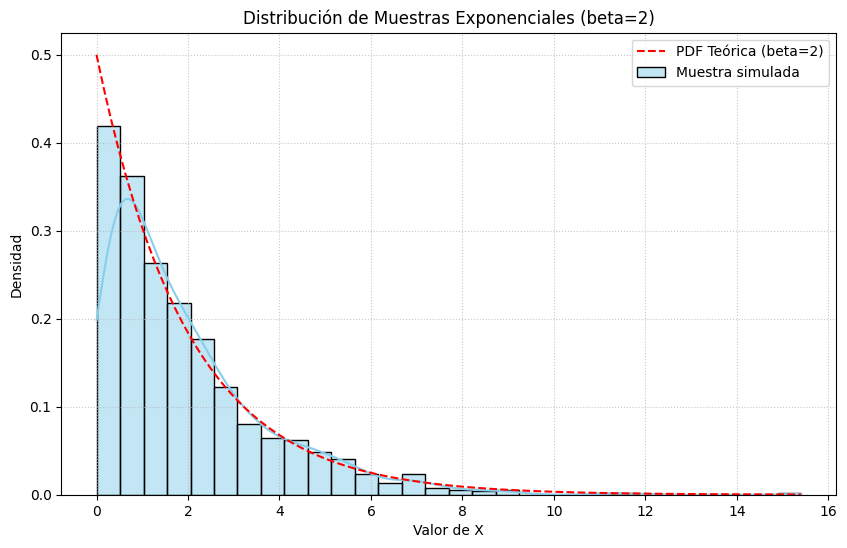

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

beta = 2
num_muestras = 1000

print(f"Parametro beta de la exponencial: {beta}")
print(f"Numero de muestras a simular: {num_muestras}\n")

U = np.random.rand(num_muestras)

muestra_exponencial = -beta * np.log(1 - U)

print(f"Primeras 10 muestras: {muestra_exponencial[:10]}\n")
print(f"Media: {np.mean(muestra_exponencial):.3f} (esperado: {beta})")
print(f"Desviación estandar: {np.std(muestra_exponencial):.3f} (esperado: {beta})\n")

plt.figure(figsize=(10, 6))
sns.histplot(muestra_exponencial, bins=30, kde=True, stat='density', color='skyblue', label='Muestra simulada')

x = np.linspace(0, max(muestra_exponencial), 100)
pdf_teorica = (1/beta) * np.exp(-x/beta)
plt.plot(x, pdf_teorica, color='red', linestyle='--', label=f'PDF Teórica (beta={beta})')
plt.title(f'Distribución de Muestras Exponenciales (beta={beta})')
plt.xlabel('Valor de X')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

Ejemplo 6.4 Simula una muestra aleatoria uniforme con parámetros (a,b).

Parámetros de la Uniforme: a=5, b=15
Número de muestras a simular: 1000

Primeras 10 muestras simuladas: [ 9.63053933 10.38525519 11.33099805 14.95920838 10.74757728 10.89465202
  6.85683086  5.30285127 11.16992905  9.24275515]

Media simulada: 9.863 (esperado: 10.0)
Desviación estandar de la muestra: 2.880 (esperado: 2.887)



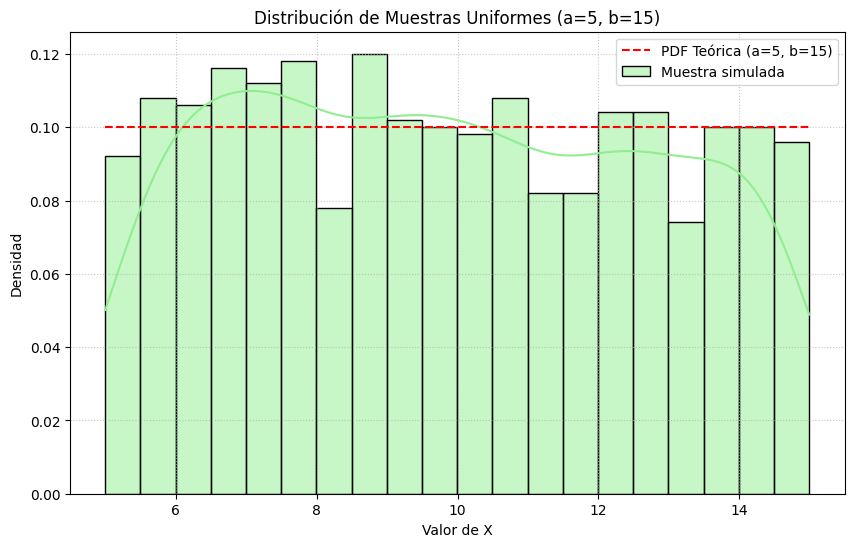

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = 5
b = 15
num_muestras = 1000

print(f"Parámetros de la Uniforme: a={a}, b={b}")
print(f"Número de muestras a simular: {num_muestras}\n")

U = np.random.rand(num_muestras)

muestra_uniforme = a + (b - a) * U

print(f"Primeras 10 muestras simuladas: {muestra_uniforme[:10]}\n")
print(f"Media simulada: {np.mean(muestra_uniforme):.3f} (esperado: {(a+b)/2})")
print(f"Desviación estandar de la muestra: {np.std(muestra_uniforme):.3f} (esperado: {np.sqrt((b-a)**2/12):.3f})\n")


plt.figure(figsize=(10, 6))
sns.histplot(muestra_uniforme, bins=20, kde=True, stat='density', color='lightgreen', label='Muestra simulada')

x = np.linspace(a, b, 100)
pdf_teorica = np.full_like(x, 1/(b-a))
plt.plot(x, pdf_teorica, color='red', linestyle='--', label=f'PDF Teórica (a={a}, b={b})')
plt.title(f'Distribución de Muestras Uniformes (a={a}, b={b})')
plt.xlabel('Valor de X')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

Ejemplo 6.5 (Simulación de una muestra aleatoria triangular) Simula una muestra aleatoria triangular en (a=0, c=0.5, b=1)


Parametros de la Triangular: a=0, c=0.5, b=1
Número de muestras a simular: 1000

Primeras 10 muestras simuladas: [0.33914523 0.16972337 0.4734522  0.46181294 0.71881768 0.73698577
 0.15259547 0.67039984 0.48133655 0.45917021]

Media de la muestra simulada: 0.494 (esperado: 0.500)



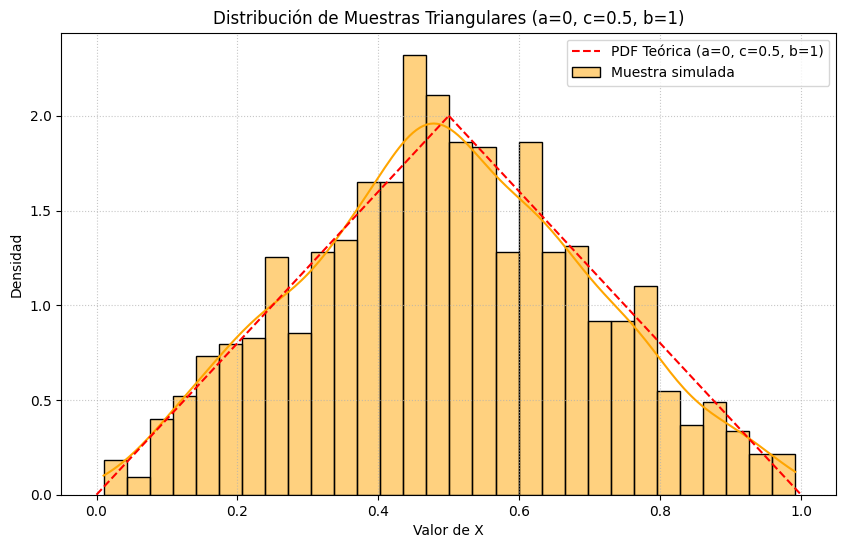

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = 0
c = 0.5
b = 1
num_muestras = 1000

print(f"Parametros de la Triangular: a={a}, c={c}, b={b}")
print(f"Número de muestras a simular: {num_muestras}\n")

Fc = (c - a) / (b - a)

U = np.random.rand(num_muestras)

muestra_triangular = np.zeros(num_muestras)
for i in range(num_muestras):
    if U[i] <= Fc:
        muestra_triangular[i] = a + np.sqrt(U[i] * (b - a) * (c - a))
    else:
        muestra_triangular[i] = b - np.sqrt((1 - U[i]) * (b - a) * (b - c))

print(f"Primeras 10 muestras simuladas: {muestra_triangular[:10]}\n")
print(f"Media de la muestra simulada: {np.mean(muestra_triangular):.3f} (esperado: {(a+b+c)/3:.3f})\n")


plt.figure(figsize=(10, 6))
sns.histplot(muestra_triangular, bins=30, kde=True, stat='density', color='orange', label='Muestra simulada')

x_pdf_1 = np.linspace(a, c, 100)
pdf_teorica_1 = 2 * (x_pdf_1 - a) / ((b - a) * (c - a))

x_pdf_2 = np.linspace(c, b, 100)
pdf_teorica_2 = 2 * (b - x_pdf_2) / ((b - a) * (b - c))

plt.plot(x_pdf_1, pdf_teorica_1, color='red', linestyle='--', label=f'PDF Teórica (a={a}, c={c}, b={b})')
plt.plot(x_pdf_2, pdf_teorica_2, color='red', linestyle='--')
plt.title(f'Distribución de Muestras Triangulares (a={a}, c={c}, b={b})')
plt.xlabel('Valor de X')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

 Ejemplo 6.6 (Simulación de una muestra aleatoria Weibull) Simula una muestra aleatoria con distribución Weibull(λ =1,k =5)

Parametros: lambda=1, k=5
Numero de muestras: 1000

Primeras 10 muestras simuladas: [1.04708796 0.78098047 0.96391044 0.89149037 1.21924778 0.58495298
 0.92751212 1.21072548 1.16402769 1.05033554]

Media de la muestra simulada: 0.922
Desviación estandar: 0.206



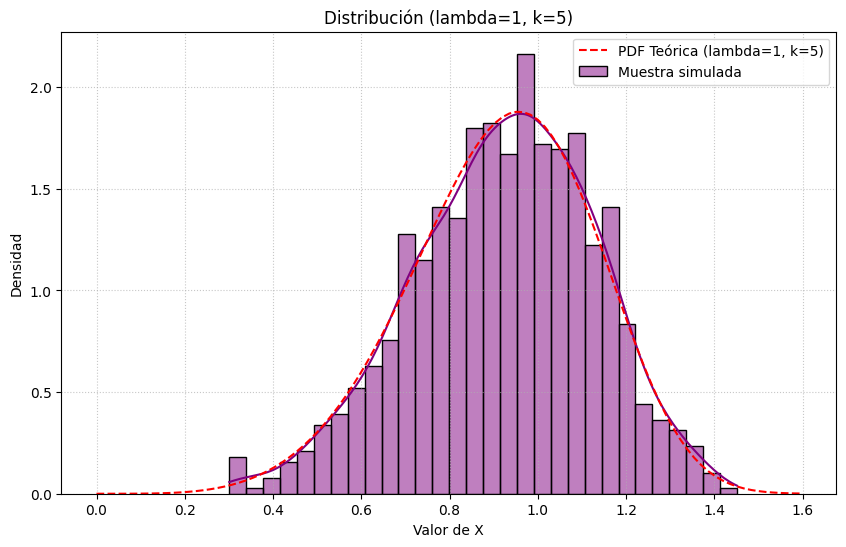

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min

lam = 1  # lambda
k = 5
num_muestras = 1000

print(f"Parametros: lambda={lam}, k={k}")
print(f"Numero de muestras: {num_muestras}\n")

U = np.random.rand(num_muestras)

muestra_weibull = lam * ((-np.log(1 - U))**(1/k))

print(f"Primeras 10 muestras simuladas: {muestra_weibull[:10]}\n")
print(f"Media de la muestra simulada: {np.mean(muestra_weibull):.3f}")
print(f"Desviación estandar: {np.std(muestra_weibull):.3f}\n")


plt.figure(figsize=(10, 6))
sns.histplot(muestra_weibull, bins=30, kde=True, stat='density', color='purple', label='Muestra simulada')

x = np.linspace(0, max(muestra_weibull) * 1.1, 100)

pdf_teorica = weibull_min.pdf(x, c=k, scale=lam)
plt.plot(x, pdf_teorica, color='red', linestyle='--', label=f'PDF Teórica (lambda={lam}, k={k})')
plt.title(f'Distribución (lambda={lam}, k={k})')
plt.xlabel('Valor de X')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [ ]:
############################


